# <center> This is ML Classification Fun Trial on Kvasir Dataset</center>


## 1) Dataset downloaded via command 
```bash
wget https://datasets.simula.no/kvasir/data/kvasir-dataset.zip
unzip kvasir-dataset.zip
```
Dataset description as per the website 
```
"Kvasir version 1

The first version of the Kvasir dataset (v1) consists of 4,000 images in 8 classes showing anatomical landmarks, phatological findings or endoscopic procedures in the GI tract, i.e., 500 images for each class. The anatomical landmarks are Z-line, pylorus and cecum, while the pathological finding are esophagitis, polyps and ulcerative colitis. In addition, we provide two set of images related to removal of polyps, the "dyed and lifted polyp" and the "dyed resection margins".

Kvasir Dataset v1

The kvasir-dataset.zip (size 1.2 GB) archive contains 4,000 images, 8 classes, 500 images for each class. The images are stored in the separate folders named accordingly to the name of the class images belongs to. The image files are encoded using JPEG compression. The encoding settings can vary across the dataset and they reflecting the a priori unknown endoscopic equipment settings. The extension of the image files is ".jpg".

Extracted Features (Kvasir Dataset v1)

The kvasir-dataset-features.zip (size 4.7 MB) archive contains the extracted visual feature descriptors for all the image from the Kvasir Dataset. The extracted visual features are stored in the separate folders and files named accordingly to the name and the path of the corresponding image files. The extracted visual features are the global image features, namely: JCD, Tamura, ColorLayout, EdgeHistogram, AutoColorCorrelogram and PHOG. Each feature vector consists of a number of floating point values. The size of the vector depends on the feature. The size of the feature vectors are: 168 (JCD), 18 (Tamura), 33 (ColorLayout), 80 (EdgeHistogram), 256 (AutoColorCorrelogram) and 630 (PHOG). The extracted visual features are stored in the text files. Each file consists of eight lines, one line per each feature. Each line consists of a feature name separated from the feature vector by colon. Each feature vector consists of a corresponding number of floating point values separated by commas. The extension of the extracted visual feature files is ".features"."
```

## 2) Explore the data
We have 8 directories, each with 500 .jpg images.
Directories' names (classes' names): 
1. dyed-lifted-polyps
2. dyed-resection-margins
3. esophagitis
4. normal-cecum
5. normal-pylorus
6. normal-z-line
7. polyps
8. ulcerative-colitis

## 3) Downloading and Exploring the features' files
using the following _Bash_ commands:
``` bash
wget https://datasets.simula.no/kvasir/data/kvasir-dataset-features.zip
unzip kvasir-dataset-features.zip
```
The data organized in the sae way.. 8 directories.. each with 500 files (txt files in csv format but file name ending in .features)


In [19]:
! ls kvasir-dataset-features -1
! echo
! ls kvasir-dataset-features/dyed-lifted-polyps/ -1 | head -1
! echo
! cat ./kvasir-dataset-features/dyed-lifted-polyps/0053d7cd-549c-48cd-b370-b4ad64a8098a.features | cut -d, -f 1 | cut -d: -f 1

dyed-lifted-polyps
dyed-resection-margins
esophagitis
normal-cecum
normal-pylorus
normal-z-line
polyps
ulcerative-colitis

0053d7cd-549c-48cd-b370-b4ad64a8098a.features
ls: write error: Broken pipe

JCD
Tamura
ColorLayout
EdgeHistogram
AutoColorCorrelogram
PHOG


## 4) Analysis

### Imporing Needed Libraries 


In [29]:
# importing libraries
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Clf models
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron

### Reading the data (.features files) and Organizing them in 6 DFs

In [3]:
path = './kvasir-dataset-features/'
data_classes = os.listdir(path)

In [3]:
# Don't run this one again!
# create 6 empty dataframes for the features 
JCD_df = pd.DataFrame()
Tamura_df = pd.DataFrame()
ColorLayout_df = pd.DataFrame()
EdgeHistogram_df = pd.DataFrame()
AutoColorCorrelogram_df = pd.DataFrame()
PHOG_df = pd.DataFrame()
    
for data_class in data_classes:
    # loop over the 8 directories.
    sub_path = path + data_class + '/'
    
#     for file_name in os.listdir(sub_path):
#         file_path = sub_path + file_name
    for file_path in glob.iglob(sub_path + '*.features'):
        file_name = file_path.split('/')[3]
        # loop over the 500 sample in each directory
        
        # appending to the 6 datafreames preiouvesly created
        # print(file_path)
        file_object = open(file_path)
        sample_name = data_class + '/' + file_name.split('.features')[0]
        
        JCD_df = JCD_df.append(pd.Series(file_object.readline().split(':')[1].rstrip('\n').split(','), name = sample_name))
        Tamura_df = Tamura_df.append(pd.Series(file_object.readline().split(':')[1].rstrip('\n').split(','), name = sample_name))
        ColorLayout_df = ColorLayout_df.append(pd.Series(file_object.readline().split(':')[1].rstrip('\n').split(','), name = sample_name))
        EdgeHistogram_df = EdgeHistogram_df.append(pd.Series(file_object.readline().split(':')[1].rstrip('\n').split(','), name = sample_name))
        AutoColorCorrelogram_df = AutoColorCorrelogram_df.append(pd.Series(file_object.readline().split(':')[1].rstrip('\n').split(','), name = sample_name))
        PHOG_df = PHOG_df.append(pd.Series(file_object.readline().split(':')[1].rstrip('\n').split(','), name = sample_name))
        
        file_object.close()


### Saving the DFs in CSV files for easier reading and better readability

In [5]:
# # Saving all to df.csv files for easier reading
# ! mkdir data
# JCD_df.to_csv(r'./data/JCD_df.csv', header=False)
# Tamura_df.to_csv(r'./data/Tamura_df.csv', header=False)
# ColorLayout_df.to_csv(r'./data/ColorLayout_df.csv', header=False)
# EdgeHistogram_df.to_csv(r'./data/EdgeHistogram_df.csv', header=False)
# AutoColorCorrelogram_df.to_csv(r'./data/AutoColorCorrelogram_df.csv', header=False)
# PHOG_df.to_csv(r'./data/PHOG_df.csv', header=False)

In [4]:
# Reading from .csv files previously saved 
JCD_df = pd.read_csv(r'./data/JCD_df.csv', header=None)
Tamura_df = pd.read_csv(r'./data/Tamura_df.csv', header=None)
ColorLayout_df = pd.read_csv(r'./data/ColorLayout_df.csv', header=None)
EdgeHistogram_df = pd.read_csv(r'./data/EdgeHistogram_df.csv', header=None)
AutoColorCorrelogram_df = pd.read_csv(r'./data/AutoColorCorrelogram_df.csv', header=None)
PHOG_df = pd.read_csv(r'./data/PHOG_df.csv', header=None)

### Building Functions for ML models

In [9]:
def try_model(model, X, y, split_size=0.40):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, stratify=y)
    clf_model = model
    clf_model.fit(X_train, y_train)
    acc_score = clf_model.score(X_test, y_test)
    return (str(model).split('(')[0], round(acc_score, 2))

In [43]:
def try_pca(X, y, X_name):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    df = pd.DataFrame(dict(x=X_pca[:,0], y=X_pca[:,1], label=y))

    groups = df.groupby('label')

    # Plot
    fig, ax = plt.subplots()
    ax.margins(0.05)
    for name, group in groups:
        ax.plot(group.x, group.y, marker='.', linestyle='', ms=12, label=name)
    ax.legend()
    plt.title('PCA for ' + X_name)
    plt.xlabel('PCA1_' + X_name)
    plt.ylabel('PCA2_' + X_name)
    plt.savefig('PCA_'+ X_name + '.png')
    plt.show()

### Preparing the DFs into X and y for clf.

In [6]:
# Defining all possible X and y.
y = [item for item in data_classes for i in range(500)]

JCD_X = JCD_df.drop(0, axis=1)
Tamura_X = Tamura_df.drop(0, axis=1)
ColorLayout_X = ColorLayout_df.drop(0, axis=1)
EdgeHistogram_X = EdgeHistogram_df.drop(0, axis=1)
AutoColorCorrelogram_X = AutoColorCorrelogram_df.drop(0, axis=1)
PHOG_X = PHOG_df.drop(0, axis=1)

### Trying 5 different Clfs. on one (best) DF.

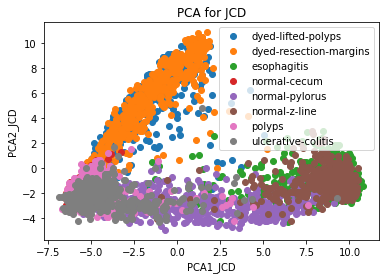

,Accuracy
SVC,0.71
LinearDiscriminantAnalysis,0.70
GaussianNB,0.52
DecisionTreeClassifier,0.66
Perceptron,0.65


In [46]:
XX = JCD_X

models = [SVC(kernel='linear'), 
          LinearDiscriminantAnalysis(), 
          GaussianNB(), 
          DecisionTreeClassifier(), 
          Perceptron()]
model_results = {}
for model in models:
    key, val = try_model(model, XX, y, 0.20)
    model_results[key] = val
    
df2 = pd.DataFrame(list(model_results.values()), list(model_results.keys()))
df2.columns = ["Accuracy"]   

try_pca(XX, y, 'JCD')
df2
# This feature (which produced the highest accuracy score), is not linearly seperable!